## Практика проверки гипотез

In [1]:
import numpy as np
from scipy import stats
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1.** По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

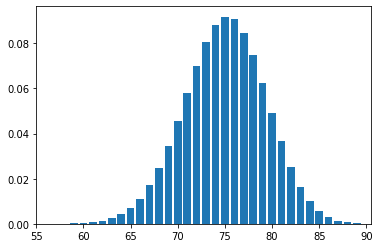

In [2]:
# Посмотрим на такое распределение
# Гипотеза H0 - доля недовольных 75%
n = 100
F_H0 = stats.binom(n, 0.75)

x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(55, 90.5) 
pylab.show()

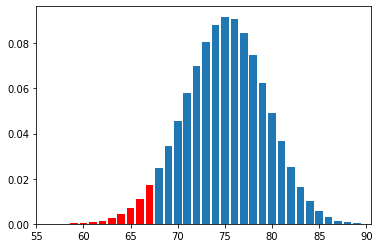

In [3]:
# Гипотеза H1 - доля недовольных 68% или <
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(0,67,68), F_H0.pmf(np.linspace(0,67,68)), align = 'center', color='red')
xlim(55, 90.5)
pylab.show()

In [4]:
# p-value гипотезы H1
p_value_1 = round(stats.binom_test(67, 100, 0.75, alternative = 'two-sided'), 4)
print(f'p-value гипотезы H1 = {p_value_1}')

p-value гипотезы H1 = 0.0822


Вывод: Уровень значимости > 0.05 гипотеза $H_0$ не отвергается

**2.** Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

- Эта сеть менее популярна, поэтому в её ресторанах меньше поток посетителей; отсюда меньший уровень стресса у работников
- Сотрудники чрезмерно оптимистично отвечали на вопрос, потому что опрос не был анонимным
- Условия работы в этой сети лучше, чем в среднем 

**3.** The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

In [5]:
import pandas as pd

data = pd.read_csv('data\pines.txt', sep='\t')
sn = data.sn.values
we = data.we.values

In [6]:
data_stat = stats.binned_statistic_2d(sn, we, None, 'count', bins=5).statistic
data_stat

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [7]:
exp_mean_trees = np.sum(data_stat)/25
print(f'Среднеевзвешенное значение сосен в каждом квадрате при равмномерном распределении: {exp_mean_trees}')

Среднеевзвешенное значение сосен в каждом квадрате при равмномерном распределении: 23.36


**4.** Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы имеет распределение хи-квадрат с числом степеней свободы $K-1-m$, где $m$ - число параметров распределения, оцененных по выборке.

In [8]:
expext_data_stat = np.array([[exp_mean_trees for i in range(5)] for j in range(5)])

In [9]:
print(f'Статистика критерия хи-квадрат: {round(stats.chisquare(data_stat, expext_data_stat, ddof = 0, axis=None).statistic, 2)}')

Статистика критерия хи-квадрат: 150.59


**5.** Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно? 

Нулевое распределение статистики — хи-квадрат с $25-1=24$ степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы $K-1$, где $K$ — количество интервалов).

Посчитайте достигаемый уровень значимости.  

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare  — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [10]:
print(f'Уровень значимости критерия хи-квадрат: {stats.chisquare(data_stat, expext_data_stat, ddof = 0, axis=None).pvalue}')

Уровень значимости критерия хи-квадрат: 2.574669774967279e-20
